In [1]:
# This is the sample code to see what happens for changing the threshold value for prediction.
# For understanding the concept, check-out my article here ->
# https://medium.com/@sayanroy729/what-is-precision-recall-trade-off-3487db276ffc

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
# load the mnist dataset
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# define the dependent & independent variable
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy().astype(np.uint8)

print(f"Shape of independent variable: {X.shape}")
print(f"Shape of dependent variable:   {y.shape}")

Shape of independent variable: (70000, 784)
Shape of dependent variable:   (70000,)


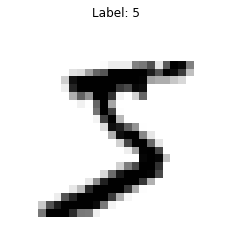

In [5]:
# now visalize a digit
some_digit       = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y[0]}")
plt.show()

In [6]:
# create training set and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# True for all 5s, False for all other digits. This will make binary classification problem
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

In [7]:
# create a SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [8]:
# train our classifier
sgd_clf.fit(X_train, y_train_5)

y_train_pred = sgd_clf.predict(X_train)

In [9]:
# confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [10]:
# create a function to visualize the confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g')

    ax.set_title('Confusion Matrix',  fontsize=16);
    ax.set_xlabel('\nPredicted Values', fontsize=16)
    ax.set_ylabel('Actual Values', fontsize=16);

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels([0, 1])
    ax.yaxis.set_ticklabels([0, 1])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

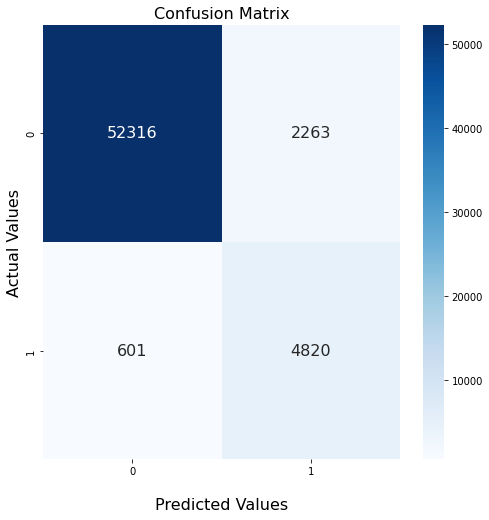

In [11]:
# visualize the confusion matrix
plot_confusion_matrix(cm)

In [12]:
# calculate precision & recall
precision = precision_score(y_train_5, y_train_pred)
recall    = recall_score(y_train_5, y_train_pred)
f1        = f1_score(y_train_5, y_train_pred)

print(f"Precision = {precision}")
print(f"Recall    = {recall}")
print(f"F1 Score  = {f1}")

Precision = 0.6805026118876183
Recall    = 0.8891348459693783
F1 Score  = 0.7709532949456175


In [13]:
# dicision score given by our classifier
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [14]:
# in scikit learn, the default threshold = 0
threshold         = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [15]:
# increase the threshold value
threshold         = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [16]:
# prediction by using increased threshold value
y_train_pred = sgd_clf.decision_function(X_train)
y_train_pred = (y_train_pred > threshold)

# confusion matrix for out new threshold value
cm = confusion_matrix(y_train_5, y_train_pred)

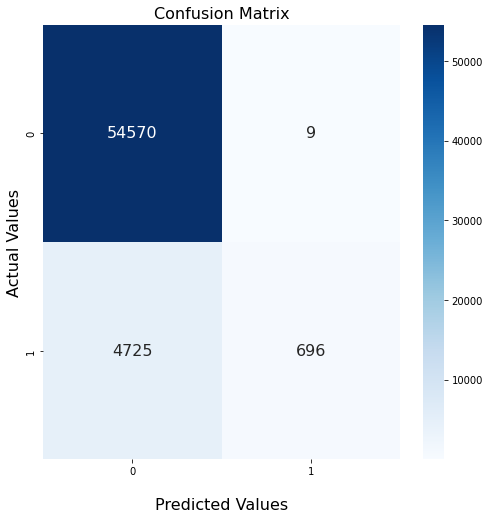

In [17]:
# visualise the confusion matrix
plot_confusion_matrix(cm)

In [18]:
# calculate precision & recall again
precision = precision_score(y_train_5, y_train_pred)
recall    = recall_score(y_train_5, y_train_pred)
f1        = f1_score(y_train_5, y_train_pred)

print(f"Precision = {precision}")
print(f"Recall    = {recall}")
print(f"F1 Score  = {f1}")

Precision = 0.9872340425531915
Recall    = 0.1283895960154953
F1 Score  = 0.22722820763956902
